**TASK 2**: MOVIE RATING PREDICTION

Author: IMAM HUSSAIN B


Batch : APRIL BATCH B23

Domain : Data Science

Aim : Build a model that predicts the ratig of a movie based on features like genre, directors, actprs.

IMPORTING IMPORTANT LIBRARIES

In [6]:
!pip install tabulate
from tabulate import tabulate
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

+---+------+-------------------------+--------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+----------------------------------------------------------------------------+------+-------------------+--------+
|   | Rank |          Title          |          Genre           |                                                                                                          Description                                                                                                           |       Director       |                                   Actors                                   | Year | Runtime (Minutes) | Rating |
+---+------+-------------------------+--------------------------+---------------------------------------------------------------------------------

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv('/content/drive/MyDrive/IMDB_Movie_Data.csv', engine='python')

In [37]:
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               1000 non-null   int64  
 1   Title              1000 non-null   object 
 2   Genre              1000 non-null   object 
 3   Description        1000 non-null   object 
 4   Director           1000 non-null   object 
 5   Actors             1000 non-null   object 
 6   Year               1000 non-null   int64  
 7   Runtime (Minutes)  1000 non-null   int64  
 8   Rating             1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [10]:
df.shape

(1000, 9)

In [36]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200
std,288.819436,3.205962,18.810908,0.945429
min,1.000000,2006.000000,66.000000,1.900000
25%,250.750000,2010.000000,100.000000,6.200000
50%,500.500000,2014.000000,111.000000,6.800000
75%,750.250000,2016.000000,123.000000,7.400000
max,1000.000000,2016.000000,191.000000,9.000000


<ipython-input-20-b4b3ea1f4c11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')


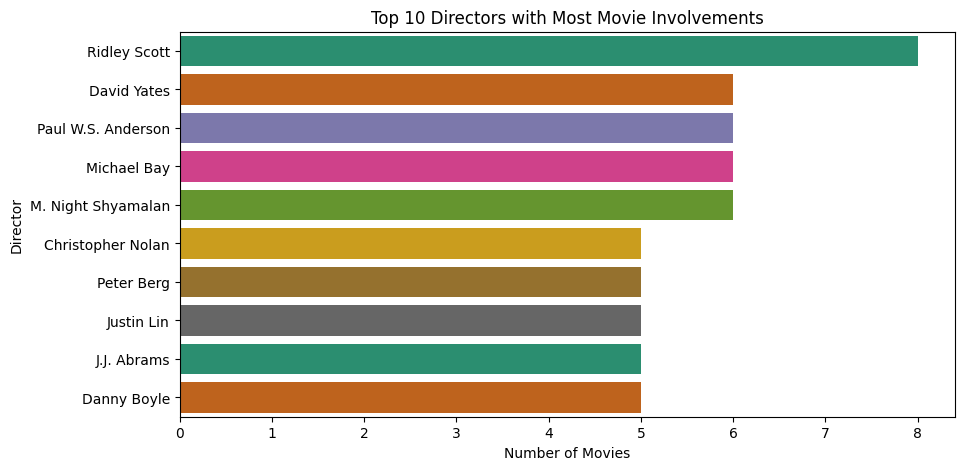

In [20]:
#Top 10 Movie Directors
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

<ipython-input-21-9893041ef5e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')


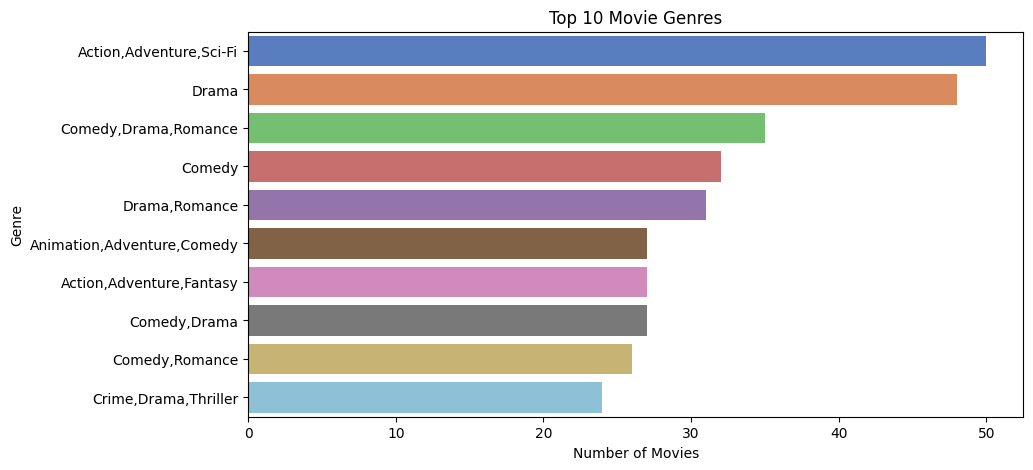

In [21]:
#Top 10 Movie Genres
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

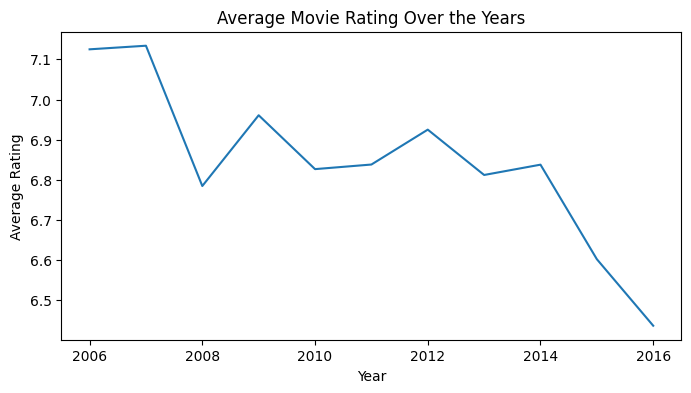

In [23]:
# Average Rating over these years

# Calculate the average rating for each year
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

#Plot
plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(False)
plt.show()

In [35]:
# High rated movie details
high_rating_movies = df[df['Rating'] > 8.5]
high_rating_movies


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6


In [33]:


# @title Group by Rating and get the count of movies which have higher than rating value 8.5
rating_counts = high_rating_movies.groupby('Rating')['Title'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts


,Rating,Number of Movies
2,9.0,1
1,8.8,2
0,8.6,3


In [38]:
# @title Using dataframe rating_counts : Bar graph

import altair as alt

alt.Chart(rating_counts).mark_bar().encode(
    x='Rating',
    y='Number of Movies'
)


alt.Chart(...)

In [49]:
# @title Create new features

  # Creating genre Average Rating
Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating

  # Creating Director Average Rating
Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating

df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Genre_Average_Rating,Director_Average_Rating
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,6.724000,7.133333
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,6.850000,6.850000
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,5.643750,5.533333
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,7.100000,7.200000
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,6.329630,7.166667
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,6.808696,6.200000
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,5.445455,5.266667
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,6.200000,6.166667
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,5.850000,5.600000


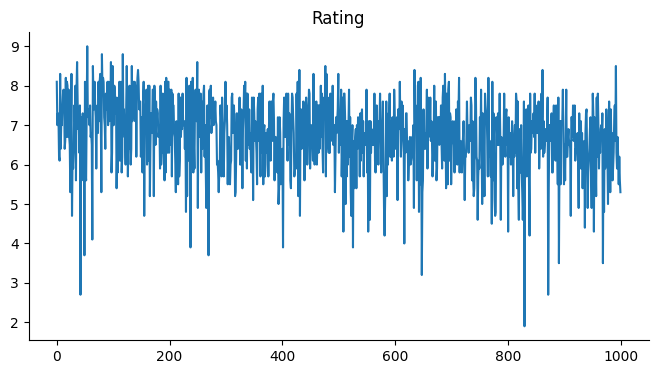

In [51]:
# @title Rating

from matplotlib import pyplot as plt
df['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

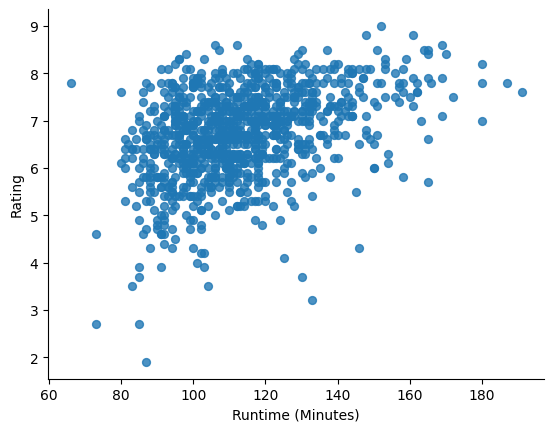

In [50]:
# @title Runtime (Minutes) vs Rating

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Runtime (Minutes)', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [67]:
# Prepare the data
X = df[['Director', 'Actors', 'Genre']]  # Predictors
y = df['Rating']  # Target

In [68]:
label_encoders = {}
for col in ['Director', 'Actors', 'Genre']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the encoder for later use

<ipython-input-68-f277d2ea2ed2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-68-f277d2ea2ed2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-68-f277d2ea2ed2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [69]:
# @title Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# @title Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [71]:
# @title Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.9845440872527255
R-squared: -0.027103132657522844


In [73]:
#@title Regression Model for One-Hot Encoding

# Assume df is already defined and has 'Director', 'Actors', 'Genre', and 'Rating' columns

# One-Hot Encoding
X = pd.get_dummies(df[['Director', 'Actors', 'Genre']], drop_first=True)  # Avoid dummy variable trap
y = df['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (One-Hot): {mse}")
print(f"R-squared (One-Hot): {r2}")


Mean Squared Error (One-Hot): 0.7368223756191248
R-squared (One-Hot): 0.23132688519585032
